# Netowrk karstic output and plot
## Extract the karstic information and compute some statistic on the networks used for the simulation and the corresponding flow

In [ ]:
import numpy as np
import vtk
import pyvista as pv
import os
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from matplotlib.colors import LogNorm
def read_pickle(path):
    with open(path,'rb') as f:
        file = pickle.load(f)
    return file
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt, ticker as mticker


In [10]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [11]:
pressure_list = [40]
out_list = []

for pressure in pressure_list:
    out = []
    for i in range(5):
        path = 'output_2021/out_{1}bar_2021/out_{0}/save_flow/output_simulations_{0}.pickle'.format(i,pressure)
        out.append(read_pickle(path))
        
    out = np.concatenate(out)
    out_list.append(out)
    
out_df = []
for out in out_list:
    data = {}
    data['time_step'] = [t[0] for t in out[:,2]]
    data['flow_rate'] = [t[1] for t in out[:,2]]
    data['pos_x']     = [t[0] for t in out[:,3]]
    data['pos_y']     = [t[1] for t in out[:,3]]
    data['pipe_diam'] = [t[3] for t in out[:,3]]
    data['seed']      = [t for t in out[:,4]]
    data['case_nb']   = [t for t in out[:,5]]
    out_df.append(pd.DataFrame(data))

In [12]:
out_df[0].seed

0      200000008
1      200000008
2      200000008
3      200000008
4      200000008
         ...    
595    200000041
596    200000041
597    200000041
598    200000041
599    200000041
Name: seed, Length: 600, dtype: object

In [13]:
out_df[0][out_df[0].seed == '200000008']

,time_step,flow_rate,pos_x,pos_y,pipe_diam,seed,case_nb
0,1.0,0.616825,782.0,17.0,6.4778,200000008,1
1,1.0,1.050667,1092.0,157.0,4.7037,200000008,1
2,1.0,0.541062,482.0,42.0,1.6123,200000008,1
3,1.0,0.938956,1717.0,167.0,1.3616,200000008,1
4,1.0,0.144636,1482.0,57.0,0.9507,200000008,1
5,1.0,0.164988,1292.0,57.0,1.8212,200000008,1
60,1.0,0.234544,1772.0,172.0,1.7002,200000008,2
61,1.0,0.182163,372.0,57.0,0.9683,200000008,2
62,1.0,0.057303,1812.0,97.0,1.2901,200000008,2
63,1.0,0.500836,1372.0,167.0,1.0941,200000008,2


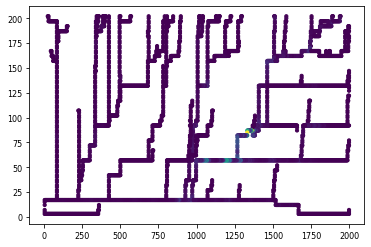

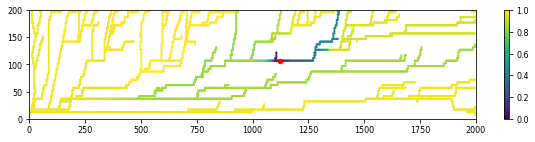

In [14]:
karst_2d_cas1 = pv.read('./output_2021/out_40bar_2021/out_0/save_karst/karst_flow_1d_200000008_cas_1.vtk')
karst_1d_cas2 = pv.read('./output_2021/out_40bar_2021/out_0/save_karst/karst_flow_1d_200000008_cas_2.vtk')

keys = karst_1d_cas1.array_names

karst_1d_cas1 = karst_1d_cas1.cell_data_to_point_data()
karst_1d_cas2 = karst_1d_cas2.cell_data_to_point_data()

plt.scatter(karst_1d_cas1.points[:,0],karst_1d_cas1.points[:,2],10,karst_1d_cas1[keys[3]][:])
plt.show()

plt.figure(figsize=(10,2))
plt.scatter(karst_1d_cas2.points[:,0],karst_1d_cas2.points[:,2],1,karst_1d_cas2[keys[0]][:],alpha = 1,norm=LogNorm())
plt.scatter(1122.0,107.0,20,color ='red')
plt.xlim(0,2000)
plt.ylim(0,200)
plt.colorbar()
plt.show()

In [23]:
Edges_cas1 = pd.read_table('/edges_cas1_200000008_simply.txt',delim_whitespace=True,names=['node1','node2','diameter'])
Nodes_cas1 = pd.read_table('/nodes_cas1_200000008_simply.txt',delim_whitespace=True,names=['node','x','y'])

In [24]:
Edges_cas2 = pd.read_table('/edges_cas2_200000008_simply.txt',delim_whitespace=True,names=['node1','node2','diameter'])
Nodes_cas2 = pd.read_table('/nodes_cas2_200000008_simply.txt',delim_whitespace=True,names=['node','x','y'])

In [25]:
Edges_cas2['x1'] = Nodes_cas2.x[Edges_cas2['node1']].to_numpy()
Edges_cas2['y1'] = Nodes_cas2.y[Edges_cas2['node1']].to_numpy()
Edges_cas2['x2'] = Nodes_cas2.x[Edges_cas2['node2']].to_numpy()
Edges_cas2['y2'] = Nodes_cas2.y[Edges_cas2['node2']].to_numpy()
Edges_cas2

,node1,node2,diameter,x1,y1,x2,y2
0,0,1,1.397508,1697.0,172.0,1692.0,172.0
1,0,2680,0.959030,1697.0,172.0,1702.0,172.0
2,1,2,1.278119,1692.0,172.0,1687.0,172.0
3,2,3,1.604649,1687.0,172.0,1687.0,167.0
4,3,4,1.974813,1687.0,167.0,1687.0,162.0
...,...,...,...,...,...,...,...
3001,2936,2937,1.969494,1832.0,42.0,1827.0,42.0
3002,2937,2938,2.026215,1827.0,42.0,1822.0,42.0
3003,2938,2939,1.926030,1822.0,42.0,1817.0,42.0
3004,2939,2940,1.690288,1817.0,42.0,1812.0,42.0


In [26]:
Edges_cas1['x1'] = Nodes_cas1.x[Edges_cas1['node1']].to_numpy()
Edges_cas1['y1'] = Nodes_cas1.y[Edges_cas1['node1']].to_numpy()
Edges_cas1['x2'] = Nodes_cas1.x[Edges_cas1['node2']].to_numpy()
Edges_cas1['y2'] = Nodes_cas1.y[Edges_cas1['node2']].to_numpy()
Edges_cas1

,node1,node2,diameter,x1,y1,x2,y2
0,0,1,1.213873,1697.0,87.0,1697.0,82.0
1,0,1353,1.037233,1697.0,87.0,1697.0,92.0
2,1,2,0.922130,1697.0,82.0,1692.0,82.0
3,2,3,1.018828,1692.0,82.0,1692.0,77.0
4,3,4,0.990564,1692.0,77.0,1692.0,72.0
...,...,...,...,...,...,...,...
2123,2107,2094,1.848921,1992.0,122.0,1992.0,117.0
2124,2095,2096,2.249328,1987.0,117.0,1987.0,112.0
2125,2096,2097,1.788163,1987.0,112.0,1987.0,107.0
2126,2097,2098,1.746436,1987.0,107.0,1987.0,102.0


In [27]:
cmap = 'viridis'

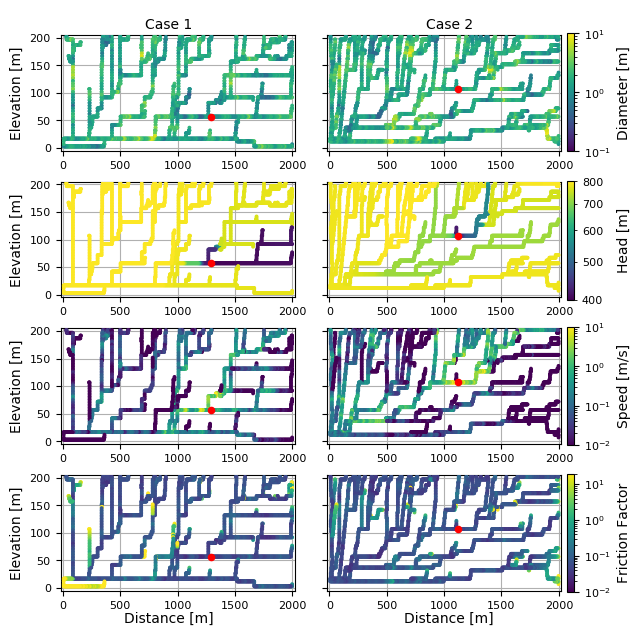

In [32]:

fig = plt.figure(figsize=(7.08661,7.87402))

gs = gridspec.GridSpec(9, 3, width_ratios=[1,1,0.07],height_ratios=[0.12,1,0.07,1,0.07,1,0.07,1,0.12],figure=fig)

#First line
ax0 = plt.subplot(gs[0])
plt.axis('off')
#plt.text(1.06,-0.2,'Diameters',size = 12,horizontalalignment='center')
plt.text(0.46,-0.4,'Case 1',size = 10,horizontalalignment='center')
plt.text(1.66,-0.4,'Case 2',size = 10,horizontalalignment='center')

ax1 = plt.subplot(gs[3])
plt.scatter(Edges_cas1.x1,Edges_cas1.y1,3,Edges_cas1.diameter,alpha = 1,norm=LogNorm(),vmin = 0.1,vmax = 10, zorder = 11,cmap=cmap)
plt.scatter(Edges_cas1.x2,Edges_cas1.y2,3,Edges_cas1.diameter,alpha = 1,norm=LogNorm(),vmin = 0.1,vmax = 10, zorder = 11,cmap=cmap)
plt.scatter(1292.0,57.0,20,color ='red', zorder = 12)

plt.xlim(-20,2020)
plt.ylim(-5,205)
plt.ylabel('Elevation [m]')
plt.grid('on')

ax2 = plt.subplot(gs[4])
a = plt.scatter(Edges_cas2.x1,Edges_cas2.y1,3,Edges_cas2.diameter,alpha = 1,norm=LogNorm(),vmin = 0.1,vmax = 10, zorder = 11,cmap=cmap)
plt.scatter(Edges_cas2.x2,Edges_cas2.y2,3,Edges_cas2.diameter,alpha = 1,norm=LogNorm(),vmin = 0.1,vmax = 10, zorder = 11,cmap=cmap)
plt.scatter(1122.0,107.0,20,color ='red', zorder = 12)
plt.xlim(-20,2020)
plt.ylim(-5,205)
plt.grid('on')
ax2.yaxis.set_ticklabels([])

cb_ax = fig.add_axes([0.84, .7, 0.01, 0.15])
cbar = fig.colorbar(a, cax=cb_ax)
cbar.set_label('Diameter [m]')
#Second Line

#ax3 = plt.subplot(gs[6])
#plt.axis('off')
#plt.text(1.06,-0.2,'Head',size = 12,horizontalalignment='center')

ax4 = plt.subplot(gs[9])
plt.scatter(karst_1d_cas1.points[:,0],karst_1d_cas1.points[:,2],3,karst_1d_cas1[keys[0]][:],alpha = 1,norm=LogNorm(),vmin = 400,vmax = 800, zorder = 11)
plt.scatter(1292.0,57.0,20,color ='red', zorder = 12)
plt.xlim(-20,2020)
plt.ylim(-5,205)
plt.ylabel('Elevation [m]')
plt.grid('on')

ax5 = plt.subplot(gs[10])
a = plt.scatter(karst_1d_cas2.points[:,0],karst_1d_cas2.points[:,2],3,karst_1d_cas2[keys[0]][:],alpha = 1,norm=LogNorm(),vmin = 400,vmax = 800, zorder = 11)
plt.scatter(1122.0,107.0,20,color ='red', zorder = 12)
plt.xlim(-20,2020)
plt.ylim(-5,205)
plt.grid('on')
ax5.yaxis.set_ticklabels([])

cb_ax2 = fig.add_axes([0.84, .512, 0.01, 0.15])
cbar = fig.colorbar(a, cax=cb_ax2, format=':.0f')
cb_ax2.yaxis.set_minor_formatter(mticker.ScalarFormatter())
cbar.set_label('Head [m]',labelpad=10)

#Third Line
#ax6 = plt.subplot(gs[12])
#plt.axis('off')
#plt.text(1.06,-0.2,'Speed',size = 12,horizontalalignment='center')

ax7 = plt.subplot(gs[15])
plt.scatter(karst_1d_cas1.points[:,0],karst_1d_cas1.points[:,2],3,karst_1d_cas1[keys[1]][:],alpha = 1,norm=LogNorm(),vmin = 0.01,vmax = 10, zorder = 11,cmap=cmap)
plt.scatter(1292.0,57.0,20,color ='red', zorder = 12)
plt.xlim(-20,2020)
plt.ylim(-5,205)
plt.ylabel('Elevation [m]')
plt.grid('on')

ax8 = plt.subplot(gs[16])
a = plt.scatter(karst_1d_cas2.points[:,0],karst_1d_cas2.points[:,2],3,karst_1d_cas2[keys[1]][:],alpha = 1,norm=LogNorm(),vmin = 0.01,vmax = 10, zorder = 11,cmap=cmap)
plt.scatter(1122.0,107.0,20,color ='red', zorder = 12)
plt.xlim(-20,2020)
plt.ylim(-5,205)
plt.grid('on')
ax8.yaxis.set_ticklabels([])

cb_ax3 = fig.add_axes([0.84, .327, 0.01, 0.15])
cbar = fig.colorbar(a, cax=cb_ax3)
cbar.set_label('Speed [m/s]',size=10)

#Forth Line
#ax6 = plt.subplot(gs[18])
#plt.axis('off')
#plt.text(1.06,-0.2,'Friction Factor',size = 12,horizontalalignment='center')

ax9 = plt.subplot(gs[21])
plt.scatter(karst_1d_cas1.points[:,0],karst_1d_cas1.points[:,2],3,karst_1d_cas1[keys[3]][:],alpha = 1,norm=LogNorm(),vmin = 0.01,vmax = 20, zorder = 11)
plt.scatter(1292.0,57.0,20,color ='red', zorder = 12)
plt.xlim(-20,2020)
plt.ylim(-5,205)
plt.ylabel('Elevation [m]')
plt.grid('on')

ax10 = plt.subplot(gs[22])
a = plt.scatter(karst_1d_cas2.points[:,0],karst_1d_cas2.points[:,2],3,karst_1d_cas2[keys[3]][:],alpha = 1,norm=LogNorm(),vmin = 0.01,vmax = 20, zorder = 11)
plt.scatter(1122.0,107.0,20,color ='red', zorder = 12)
plt.xlim(-20,2020)
plt.ylim(-5,205)
plt.grid('on')
ax10.yaxis.set_ticklabels([])

cb_ax3 = fig.add_axes([0.84, .141, 0.01, 0.15])
cbar = fig.colorbar(a, cax=cb_ax3)

cbar.set_label('Friction Factor')

ax11 = plt.subplot(gs[24])
plt.text(0.46,-0.5,'Distance [m]',size = 10,horizontalalignment='center')
plt.text(1.66,-0.5,'Distance [m]',size = 10,horizontalalignment='center')
plt.axis('off')
plt.savefig('Pipes.pdf')
plt.show()

In [316]:
plt.hist(karst_1d_cas2[keys[3]][:])


(array([5.966e+03, 1.200e+01, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([2.53741568e-02, 1.55911388e+01, 3.11569034e+01, 4.67226680e+01,
        6.22884326e+01, 7.78541972e+01, 9.34199618e+01, 1.08985726e+02,
        1.24551491e+02, 1.40117256e+02, 1.55683020e+02]),
 <a list of 10 Patch objects>)

In [275]:
keys

['h[m]', 'v[m/s]', 'Re[-]', 'f[-]']

In [412]:
karst_2d_cas1 = pv.read('./output_2021/out_40bar_2021/out_0/save_head/flow_3d_200000008_cas_1.vtk')
karst_2d_cas2 = pv.read('./output_2021/out_40bar_2021/out_0/save_head/flow_3d_200000008_cas_2.vtk')


In [369]:
59800/200/55

5.4363636363636365

In [413]:
karst_2d_cas1 = karst_2d_cas1.cell_data_to_point_data()
karst_2d_cas2 = karst_2d_cas2.cell_data_to_point_data()

karst_2d_cas1

UnstructuredGrid (0x22c668e54c8)
  N Cells:	440000
  N Points:	470373
  X Bounds:	0.000e+00, 2.000e+03
  Y Bounds:	0.000e+00, 1.100e+02
  Z Bounds:	0.000e+00, 2.500e+02
  N Arrays:	4

In [453]:
x1 = karst_2d_cas1.points[:,0][karst_2d_cas1.points[:,1]==55.]
z1 = karst_2d_cas1.points[:,2][karst_2d_cas1.points[:,1]==55.]
data1 = np.reshape(karst_2d_cas1['h[m]'][karst_2d_cas1.points[:,1]==55.],(51,-1)) 
data1 = (data1 - 450)/(10)

data2 = np.reshape(karst_2d_cas2['h[m]'][karst_2d_cas2.points[:,1]==55.],(51,-1))
data2 = (data2 - 450)/(10)


C:\Users\nevena\AppData\Local\Continuum\anaconda3\envs\Pyclass\lib\site-packages\ipykernel_launcher.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


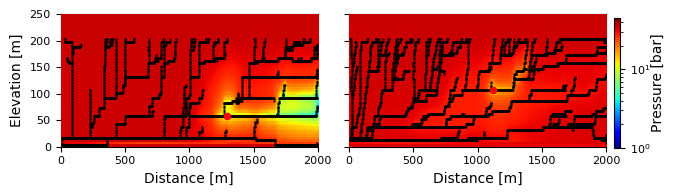

In [504]:
fig = plt.figure(figsize=(6.69291,2))
cmap = 'jet'
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,0.07],figure=fig,)

x1 = plt.subplot(gs[0])
a = plt.imshow(data1,extent = [0,2000,0,250],origin='bottom',vmin = 1, vmax = 45, zorder = 10,aspect = 'auto',norm=LogNorm(),cmap=cmap)
plt.scatter(1292.0,57.0,20,color ='red', zorder = 12)
plt.scatter(karst_1d_cas1.points[:,0],karst_1d_cas1.points[:,2],0.5,alpha = 0.7,vmin = 0.01,vmax = 20, zorder = 11,color = 'k')

plt.xlim(0,2000)
plt.ylim(0,250)

plt.ylabel('Elevation [m]')
plt.xlabel('Distance [m]')

plt.grid('on')

ax2 = plt.subplot(gs[1])
plt.imshow(data2,extent = [0,2000,0,250],origin='bottom',vmin = 1, vmax = 45, zorder = 10,aspect = 'auto',norm=LogNorm(),cmap=cmap)
plt.scatter(1122.0,107.0,20,color ='red', zorder = 12)
plt.scatter(karst_1d_cas2.points[:,0],karst_1d_cas2.points[:,2],0.5,alpha = 0.7,vmin = 0.01,vmax = 20, zorder = 11,color = 'k')
plt.xlim(0,2000)
plt.ylim(0,250)
plt.xlabel('Distance [m]')

plt.grid('on')
ax2.yaxis.set_ticklabels([])

cb_ax = fig.add_axes([0.92, .25, 0.01, 0.65])
cbar = fig.colorbar(a, cax=cb_ax)
cbar.set_label('Pressure [bar]',labelpad = 0.1)
plt.tight_layout()
plt.savefig('matrix_head.pdf')
plt.show()

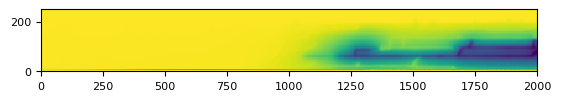

In [465]:
plt.imshow(data,extent = [0,2000,0,250],origin='bottom')
plt.show()

In [80]:
keys

['h[m]', 'Re[-]', 'f[-]', 'v[m/s]']

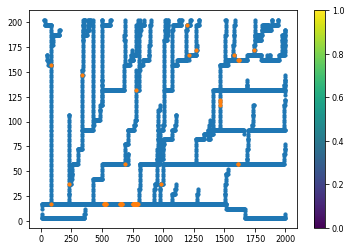

In [87]:
karst_2d_cas1 = pv.read('./output_2021/out_50bar_2021/out_0/save_karst/karst_flow_1d_200000008_cas_1.vtk')

karst_2d_cas1 = karst_2d_cas1.cell_data_to_point_data()


to_plt = np.logical_and(karst_2d_cas1[keys[2]][:] >0.2,karst_2d_cas1[keys[1]][:] > 1e4)
plt.scatter(karst_2d_cas1.points[:,0],karst_2d_cas1.points[:,2],10,vmin=0.6,vmax=1)
plt.scatter(karst_2d_cas1.points[:,0][to_plt],karst_2d_cas1.points[:,2][to_plt],10,vmin=0.6,vmax=1)
plt.colorbar()

In [79]:
karst_2d_cas1

UnstructuredGrid (0x203e4918be8)
  N Cells:	4256
  N Points:	4237
  X Bounds:	7.000e+00, 1.997e+03
  Y Bounds:	5.500e+01, 5.500e+01
  Z Bounds:	3.000e+00, 2.020e+02
  N Arrays:	4

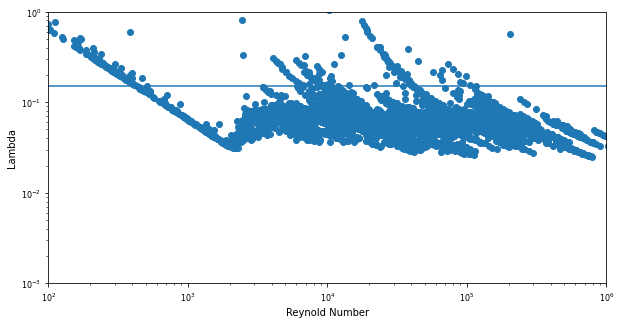

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(karst_2d_cas1[keys[1]],karst_2d_cas1[keys[2]])
plt.xlabel('Reynold Number')
plt.ylabel('Lambda')
plt.plot([100,1000000],[0.15,0.15])
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.001,1)
plt.xlim(100,1000000)

RUG = [0.2]
for Rug in RUG:  
    for Re in range(1000,10**8,10**7):
        Range=range(2300,10**8,10**7)
        def y(f):
            return -2.0*math.log10(Rug/3.7+2.51/(Re*math.sqrt(f)))-1/math.sqrt(f)
        f0= 0.0003
        f=fsolve(y,f0)
        f=np.around(f,decimals=3)  
        f1.extend(f)  
        Re1.append(Re)

In [17]:
plt.scatter(karst_2d_cas1[keys[1]],karst_2d_cas1[keys[2]])

['h[m]', 'Re[-]', 'f[-]', 'v[m/s]']

Text(450, 0.04, 'Laminar Flow\nf=64/Re')

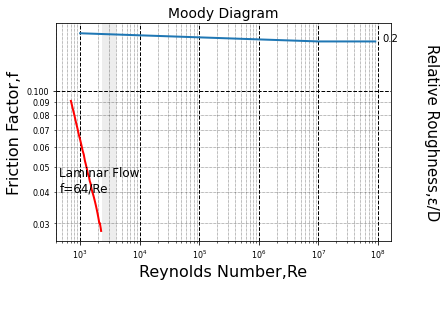

In [31]:
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy as np
import math   
import matplotlib.ticker 

f1=[]
f2=[]
Re1=[]
Rug1=[]
RE1=[]

RUG= [0.2]
for Rug in RUG:  
    for Re in range(1000,10**8,10**7):
        Range=range(1000,10**8,10**7)
        def y(f):
            return -2.0*math.log10(Rug/3.7+2.51/(Re*math.sqrt(f)))-1/math.sqrt(f)
        f0= 0.0003
        f=fsolve(y,f0)
        f=np.around(f,decimals=3)  
        f1.extend(f)  
        Re1.append(Re) 
        
tamanho=len(f1) 
TAMANHO=len(Range) 
Div=tamanho/TAMANHO
Div=round(Div) 

for i in range(0,Div,1): 
    Re1list=[Re1[i:i+TAMANHO] for i in range(0, len(Re1), TAMANHO)]
    f1list=[f1[i:i+TAMANHO] for i in range(0, len(f1), TAMANHO)] 
    f1list_=f1list[i]
    p=f1list_[TAMANHO-1] 
    plt.plot(Re1list[i],f1list[i],'-',markersize=2, linewidth=2)
    plt.title('Moody Diagram',size='xx-large')
    plt.annotate(RUG[i], (1.2*10**8,p),size=10)   
    plt.xlabel('Reynolds Number,Re',{'fontsize': 16})
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Friction Factor,f',{'fontsize': 16})
    plt.text(1.1, 0.5, 'Relative Roughness,\u03B5/D', {'color': 'k', 'fontsize': 15},    
         horizontalalignment='left',verticalalignment='center', rotation=270, clip_on=False,
         transform=plt.gca().transAxes) 
    plt.axvspan(2300, 4000, facecolor='gainsboro', alpha=0.5) 
    plt.grid(which='major', linestyle='--', linewidth='1.0', color='k') 
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='k') 
    ax = plt.gca()
    ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.yaxis.set_minor_formatter(matplotlib.ticker.ScalarFormatter())  
    plt.autoscale(enable=True, axis='y')
    plt.minorticks_on

flam=[]
RElam=[]
for RElaminar in range(700,2300,50):
    flaminar=64/RElaminar 
    flaminar=np.around(flaminar,decimals=3)  
    RElam.append(RElaminar)
    flam.append(flaminar)  
plt.plot(RElam,flam,'r-',markersize=2, linewidth=2)
plt.annotate('Transition Zone\n 2,300 < Re < 4,000', (3000,0.015),fontsize=12)
plt.annotate('Laminar Flow\nf=64/Re', (450,0.04),fontsize=12)